In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Loading the dataset & Printing the Sizes

In [3]:
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()
print('Training size: ', train_X.shape, train_Y.shape )
print('Testing size: ', test_X.shape, test_Y.shape )

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training size:  (60000, 28, 28) (60000,)
Testing size:  (10000, 28, 28) (10000,)


Printing the class label

In [4]:
classes = np.unique(train_Y)

print('No of classes:' , len(classes))
print('Label:',classes)

No of classes: 10
Label: [0 1 2 3 4 5 6 7 8 9]


Display the example of the data

Text(0.5, 1.0, 'baseline: 0')

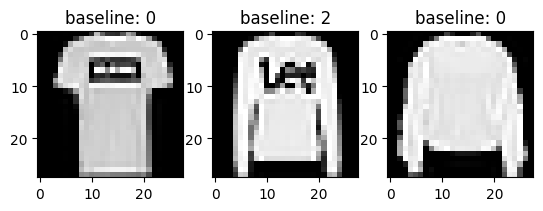

In [5]:
plt.subplot(131)
plt.imshow(train_X[1,:,:], cmap='gray')
plt.title('baseline: {}'.format(train_Y[1]))
plt.subplot(132)
plt.imshow(test_X[1,:,:], cmap='gray')
plt.title('baseline: {}'.format(test_Y[1]))
plt.subplot(133)
plt.imshow(train_X[7,:,:], cmap='gray')
plt.title('baseline: {}'.format(train_Y[1]))


Reshape the data

In [6]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)


Normalization and Data Preprocessing

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255.
test_X = test_X/255.


Using One-Hot Encoding Method

In [8]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('ori label: ', train_Y[3])
print('convert label: ', train_Y_one_hot[3])


ori label:  3
convert label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X,
                                                              train_Y_one_hot,
                                                              test_size=0.2,
                                                              random_state=13,
                                                              stratify=train_Y_one_hot)

In [10]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [11]:
# intialize the pipeline model
fashion_model = Sequential()
# convolutional layer
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(Dropout(0.25))
# pooling layer
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
# Dense & flatten (fully connected layer)
fashion_model.add(Flatten())
num_classes = len(classes)
fashion_model.add(Dense(num_classes, activation='softmax'))

# compile model
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics = ['accuracy'])
fashion_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,450 (21.29 KB)

 Trainable params: 5,450 (21.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
fashion_train = fashion_model.fit(train_X, train_label,
                                  batch_size = 750,
                                  epochs = 10,
                                  verbose = 1,
                                  validation_data = (valid_X, valid_label))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 677ms/step - accuracy: 0.3371 - loss: 2.0174 - val_accuracy: 0.6647 - val_loss: 1.2139
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 669ms/step - accuracy: 0.6833 - loss: 0.9706 - val_accuracy: 0.7412 - val_loss: 0.8366
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 643ms/step - accuracy: 0.7484 - loss: 0.7303 - val_accuracy: 0.7698 - val_loss: 0.7104
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 639ms/step - accuracy: 0.7747 - loss: 0.6347 - val_accuracy: 0.7878 - val_loss: 0.6447
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 651ms/step - accuracy: 0.7881 - loss: 0.5833 - val_accuracy: 0.8029 - val_loss: 0.6014
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 649ms/step - accuracy: 0.8021 - loss: 0.5495 - val_accuracy: 0.8080 - val_loss: 0.5704
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 649ms/step - accuracy: 0.8102 - loss: 0.5245 - val_accuracy: 0.8136 - val_loss: 0.5477
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 640ms/step - accuracy: 0.8186 - loss: 0.5016 - val_accu

In [13]:
# intialize the pipeline model
fashion_model = Sequential()
# convolutional layer
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(Dropout(0.25))
# pooling layer
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
# Dense & flatten (fully connected layer)
fashion_model.add(Flatten())
num_classes = len(classes)
fashion_model.add(Dense(num_classes, activation='softmax'))

# compile model
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics = ['accuracy'])
fashion_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,450 (21.29 KB)

 Trainable params: 5,450 (21.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
classes = np.unique(train_Y)

print('No of classes:' , len(classes))
print('Label:',classes)

No of classes: 10
Label: [0 1 2 3 4 5 6 7 8 9]


In [17]:
batch_size = 750
epochs = 10
fashion_trainin = fashion_model.fit(train_X, train_label,
                                  batch_size = batch_size,
                                  epochs = epochs,
                                  verbose = 1,
                                  validation_data = (valid_X, valid_label))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - accuracy: 0.4080 - loss: 1.9662 - val_accuracy: 0.6558 - val_loss: 1.1601
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 647ms/step - accuracy: 0.6919 - loss: 0.9360 - val_accuracy: 0.7343 - val_loss: 0.8362
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 645ms/step - accuracy: 0.7460 - loss: 0.7302 - val_accuracy: 0.7622 - val_loss: 0.7252
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 645ms/step - accuracy: 0.7739 - loss: 0.6436 - val_accuracy: 0.7802 - val_loss: 0.6585
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 663ms/step - accuracy: 0.7835 - loss: 0.5962 - val_accuracy: 0.7883 - val_loss: 0.6228
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 658ms/step - accuracy: 0.7994 - loss: 0.5556 - val_accuracy: 0.8016 - val_loss: 0.5892
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 658ms/step - accuracy: 0.8037 - loss: 0.5399 - val_accuracy: 0.8062 - val_loss: 0.5694
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 658ms/step - accuracy: 0.8123 - loss: 0.5169 - val_accu

<Figure size 640x480 with 0 Axes>

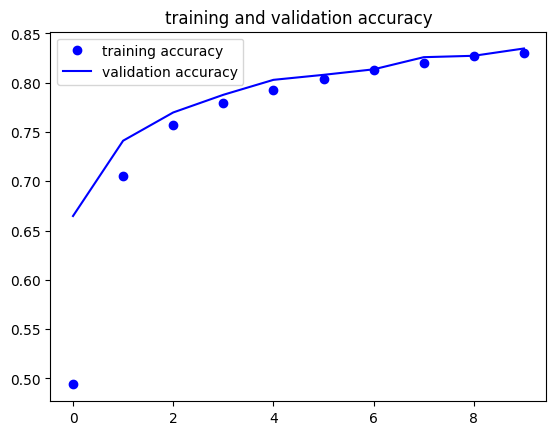

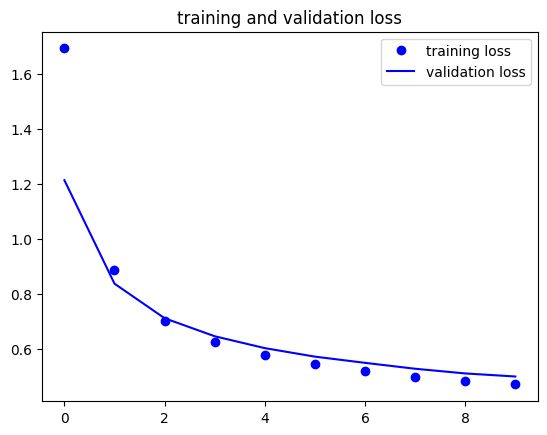

<Figure size 640x480 with 0 Axes>

In [19]:
# check overfitting
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
# plot graph
epochs = range(len(accuracy))
# accuracy
plt.plot(epochs, accuracy, 'bo', label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
# loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.figure()



In [20]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Found 7341 correct labels


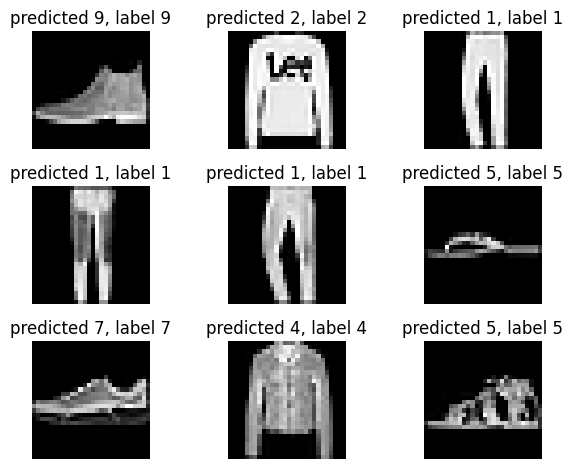

In [22]:
correct = np.where(predicted_classes == test_Y)[0]
print('Found %d correct labels' % len(correct))
# Loop through the first 9 incorrect predictions
for i, correct_index in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct_index].reshape(28, 28), cmap='gray')
    plt.title('predicted {}, label {}'.format(predicted_classes[correct_index], test_Y[correct_index]))
    plt.axis('off')  # Turn off axis for better visualization
plt.tight_layout()
plt.show()

Display the first 9 incorrect predictions.

Found 2659 incorrect labels


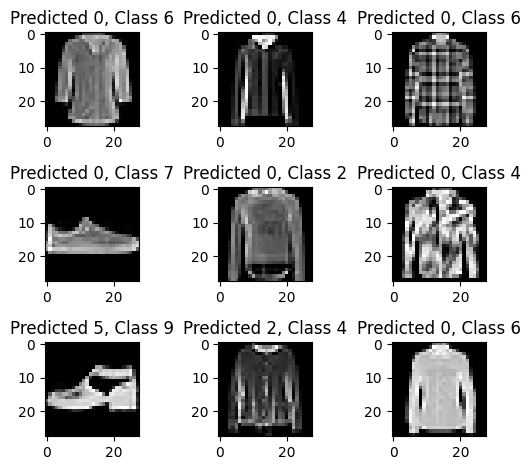

In [23]:
incorrect = np.where(predicted_classes != test_Y)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect_index in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect_index].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect_index], test_Y[incorrect_index]))
    plt.tight_layout()

In [24]:
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.32      0.95      0.48      1000
     Class 1       0.99      0.93      0.96      1000
     Class 2       0.86      0.46      0.60      1000
     Class 3       0.88      0.69      0.77      1000
     Class 4       0.75      0.56      0.64      1000
     Class 5       0.92      0.93      0.92      1000
     Class 6       0.74      0.17      0.28      1000
     Class 7       0.91      0.87      0.89      1000
     Class 8       0.98      0.88      0.93      1000
     Class 9       0.96      0.90      0.93      1000

    accuracy                           0.73     10000
   macro avg       0.83      0.73      0.74     10000
weighted avg       0.83      0.73      0.74     10000



In [25]:
## confusion matrix
result_confMatrix = confusion_matrix(test_Y, predicted_classes)
print('Conf Mat:\n', + result_confMatrix)


Conf Mat:
 [[946   0   2  33   2   1  10   0   6   0]
 [ 53 934   0  10   3   0   0   0   0   0]
 [434   0 462   3  79   0  21   0   1   0]
 [264   8   0 693  26   0   7   0   2   0]
 [359   0  41  25 555   0  19   0   1   0]
 [ 32   0   0   0   0 926   0  35   2   5]
 [704   1  31  18  71   2 169   0   4   0]
 [ 42   0   0   0   0  55   0 871   0  32]
 [ 86   1   0   8   2  12   1   5 883   2]
 [ 36   0   0   1   0  16   0  44   1 902]]


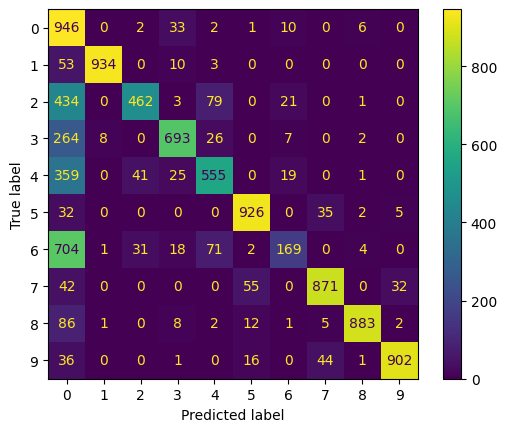

In [26]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confMatrix, display_labels = classes)
cm_display.plot()
plt.show()
